In [1]:
import pandas as pd
df=pd.read_csv("mudkheda survey form (Responses).xlsx - Form responses 1.csv")
df.head()

,Timestamp,Titleholder's Name,Serial no.,Gaurdian,Village,Caste,Gender,Category,How many members are there in your family? [Adult Male],Whether the family members are working?,...,Caste.1,Gender.1,Contact Details,Unnamed: 38,Claimant,If not going school then why not?,Photo of Aadhar Card of titleholder or heir,Photo of Land Documents,Do your children go to school? [No],"If not farming, what is the reason ?"
0,6/11/2022 7:44:57,Prakash Jatav,1798,Bharosa,Dholagarh,SC,Male,BPL,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://drive.google.com/open?id=1OhP7LJ_oN5wX...,https://drive.google.com/open?id=182cMBOynJqe5...,NaN,NaN
1,6/11/2022 7:47:15,Laxmi,1954,Nattu,Dhaulagarh,SC,Female,BPL,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://drive.google.com/open?id=1wqEs8U3q1ha6...,https://drive.google.com/open?id=1sxWRbS7faWAd...,NaN,NaN
2,6/11/2022 7:53:12,Chiddu Jatav,NaN,Bhagri Jatav,Dholagarh,SC,Male,BPL,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://drive.google.com/open?id=1hSb_nPnn14oC...,https://drive.google.com/open?id=1zNK02zImrt-l...,NaN,NaN
3,6/11/2022 8:02:26,Kallu jatav,NaN,Gariba jatav,Dhaulagarh,SC,Male,BPL,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://drive.google.com/open?id=1WckM8GH_N6hX...,NaN,NaN,NaN
4,6/11/2022 8:03:35,Jamuna jatav,1876,Ratnu,Dholagarh,SC,Male,BPL,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://drive.google.com/open?id=1VHjw7WRcFuzy...,https://drive.google.com/open?id=1rxVU7eY7ya6H...,NaN,NaN


In [2]:
df.shape
df.isnull().sum()
drop=[]
for i in df.columns:
    if df[i].isnull().sum()*100/df.shape[0]>85:
        drop.append(i)

In [3]:
drop

['Whether the family members are working?',
 'If not, then why?',
 'Photo of the individual/family outside their house',
 'Any other information that couldnt be recorded in the survey',
 'What kind of work do they undertake as migrant workers?',
 'How much land do you own?',
 'Do you do farming?',
 'Which season do you usually migrate for work? ',
 'if not then why?',
 'How many members are there in your family? [Row 4]',
 'Unnamed: 38',
 'Claimant',
 'If not going school then why not?',
 'Photo of Aadhar Card of titleholder or heir',
 'Photo of Land Documents',
 'Do your children go to school? [No]',
 'If not farming, what is the reason ?']

In [4]:
df=df.drop(drop,axis=1)
df["Timestamp"].sort_values() #(ascending=False)

142    21/11/2022
115    21/11/2022
116    21/11/2022
117    21/11/2022
118    21/11/2022
          ...    
109           NaN
110           NaN
111           NaN
112           NaN
113           NaN
Name: Timestamp, Length: 143, dtype: object

In [5]:
df.isnull().sum()

Timestamp                                                                                            19
Titleholder's Name                                                                                    0
Serial no.                                                                                           30
Gaurdian                                                                                             13
Village                                                                                              69
Caste                                                                                                 1
Gender                                                                                                0
Category                                                                                              4
How many members are there in your family? [Adult Male]                                               9
How many family members are working?                            

In [6]:
df["Were you  given patta that time?"].value_counts() #Most 99 percent were given pattas

Yes    139
No       3
Name: Were you  given patta that time?, dtype: int64

In [7]:
df.columns
# All these people had info that pattas were given to members of SC and ST community in 2002-03
#df['Were you  given patta that time?'].value_counts()
df['If yes then do you have any documents relating to the land?'].value_counts()
def docs(i):
    if i in ["yes","Yes"]:
        return "Yes"
    else:
        return "No"
    

df['If yes then do you have any documents relating to the land?']=df['If yes then do you have any documents relating to the land?'].apply(docs)
df['If yes then do you have any documents relating to the land?'].value_counts()

Yes    104
No      39
Name: If yes then do you have any documents relating to the land?, dtype: int64

In [8]:
df=df.rename({'If yes then do you have any documents relating to the land?':"Possess land documents?",'Were you  given patta that time?':"Given pattas?"},axis=1)

In [9]:
df.loc[df["Given pattas?"]=="No"].iloc[:5,11:20]  # People ot give pattas
df.loc[df["In case you know where the land is located, do you have the possession of the land?"]=="No"].iloc[:,11:20]["If you do not have possession, then why ?"].value_counts().index

Index(['Patwari ne nahi bataya', 'Nhi pta ', 'Nahi pta h',
       'Encroched by Dhakad', 'Encroched by Someone',
       'Somebody else is farming there',
       'Land was not told where the land is located', 'Encroached by Pandit',
       'Unaware of the location of the land',
       'land was not mapped and shown by the patwari  to the family ',
       'land is enchroched by someone else',
       'the family is not aware about where the land was located ',
       'Patwari didn’t inform about the land',
       'They don’t know where their land is', 'They never got their land',
       'the location of the land was not told to the family',
       'Encroached by Gurjar', 'Sadak kaat di zameen par',
       'since not aware of the location of the land therefore no posession',
       'land is enchroched and harvested by someone else ',
       'someone else is occupying the land ',
       'Encroachment by Pandit and he’s farming on the land',
       'Land not mapped ',
       'not aware about

In [10]:
df.loc[(df["If you do not have possession, then why ?"].isnull())&(df["In case you know where the land is located, do you have the possession of the land?"]=="No")]
# In logo ke pas naa to land possession hai na koi reason diya gaya hi ki inke paas possession kyu nahi hai. 
#Possible reasons maybe ecroachment or lack of info

,Timestamp,Titleholder's Name,Serial no.,Gaurdian,Village,Caste,Gender,Category,How many members are there in your family? [Adult Male],How many family members are working?,...,What is the nature of work being done by the family members?,How many members are there in your family? [Adult Female],How many members are there in your family? [Children],Do your children go to school?,Titleholder,Name of the Claimant,Relationship with Titleholder,Caste.1,Gender.1,Contact Details
9,6/11/2022 8:30:20,Jagdish,1951,Chote,Dholagarh,SC,Male,NaN,4,4 of them are working,...,3 construction worker and one Guest faculty,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,6/11/2022 8:37:34,Surash jatav,NaN,Brajlal jatav,Dholagarh,SC,Male,BPL,2,2,...,Construction Worker,4,1,Yes,NaN,NaN,NaN,NaN,NaN,NaN
13,6/11/2022 8:41:55,Vijay,1863,Rajaram,Dholagarh,NaN,Male,BPL,1,Vijay is only earning member,...,Construction Worker,1,3,Yes,NaN,NaN,NaN,NaN,NaN,NaN
15,6/11/2022 8:43:51,Balkishan Jatav,1879,Tulsi Jatav,Dholagarh,SC,Male,BPL,1,1 male,...,Construction Worker,1,6,No,NaN,NaN,NaN,NaN,NaN,NaN
17,6/11/2022 8:47:59,Gulab Jatav,1837,Naktu,Dholagarh,SC,Male,BPL,3,1 of his sons are working,...,One son is in MP police,3,2,No,NaN,NaN,NaN,NaN,NaN,NaN
18,6/11/2022 8:49:10,Ramesh Jatav,1775,Cheuram,Dholagarh,SC,Male,BPL,3,3,...,Construction Worker,2,1,No,NaN,NaN,NaN,NaN,NaN,NaN
23,6/11/2022 8:58:49,Hari jatav,1842,Bharosa jatav,Dholagarh,SC,Male,BPL,1,2,...,Construction Worker,1,4,Yes,NaN,NaN,NaN,NaN,NaN,NaN
35,6/12/2022 8:15:01,Raju Jatav,NaN,NaN,NaN,SC,Male,BPL,2,2,...,Construction Worker,4,2,Yes,Alive,Self,NaN,NaN,NaN,7.805826e+09
45,6/12/2022 8:57:04,narayan jatav,1871,pyare,NaN,SC,Male,BPL,3,3 males,...,Construction Worker,4,o,No,Dead,ram shri jatav,wife,SC,Female,NaN
60,6/14/2022 7:39:02,Kailash / Kheru,1784,kheru,NaN,ST,Male,AAY,3,3,...,Construction Worker,5,o,No,Alive,Keshav,Son,ST,Male,8.305209e+09


In [11]:
def possession(i):
    if i in ["Patwari ne nahi bataya","Nhi pta","Nahi pta h","Land was not told where the land is located",
             "Unaware of the location of the land","land was not mapped and shown by the patwari to the family",
             "the family is not aware about where the land was located","Patwari didn’t inform about the land",
             "They don’t know where their land is","the location of the land was not told to the family",
             "since not aware of the location of the land therefore no posession",
             "not aware about the location of the land that's why no posession","Doesn't know where the land is located",
             "Zameen hai kitab nahi hai aur pata bhi nahi hai","Location of the land is not known.","Location is not known",
             "the land was not marked and the claimants is not aware about where the land is",
             "dont have the document related the title of the land",
             "not aware of the location of the land that's why no posession",
             "Since not aware of the loaction of the land, therefore no posession"]:
        return "Lack of information"
    elif i in ["Encroched by Dhakad","Encroched by Someone","Somebody else is farming there",
               "land is enchroched by someone else","Encroached by Pandit","Encroached by Gurjar","Sadak kaat di zameen par",
               "land is enchroched and harvested by someone else","someone else is occupying the land",
               "Encroachment by Pandit and he’s farming on the land","Balli Tiwari is farming on the land for 3 years now",
               "Encroached by Banjaras","One Pandit is farming on the land.",
               "someone else is occupying and have possesion of the land",
               "someone else has the possesion of the land and occupying and using it",
               "someone else is occupying and using the land"]:
        return "Encroachment"
    elif i=='Disabled so does not work':
        return "Other causes"
    

In [12]:
df["If you do not have possession, then why ?"]=df["If you do not have possession, then why ?"].apply(possession)
df["If you do not have possession, then why ?"].value_counts()
    


Lack of information    34
Encroachment           24
Other causes            1
Name: If you do not have possession, then why ?, dtype: int64

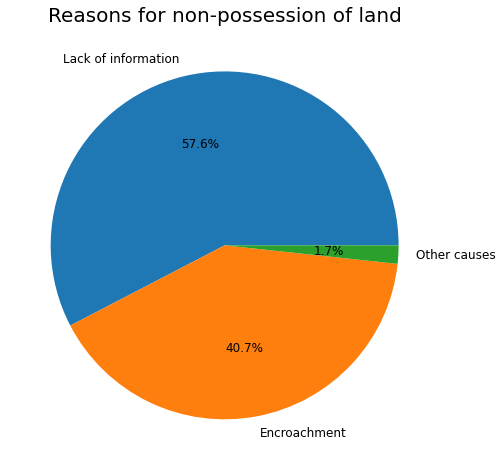

In [13]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size'] = 12
plt.rcParams["figure.figsize"]=[12,8]
plt.pie(df["If you do not have possession, then why ?"].value_counts().values, labels=df["If you do not have possession, then why ?"].value_counts().index, autopct='%1.1f%%')
plt.title("Reasons for non-possession of land",fontsize=20)
plt.show()

In [39]:
df.loc[df['In case you know where the land is located, do you have the possession of the land?']=="No",'What is the nature of work being done by the family members?'].value_counts()
# Those working in non-agricultural sectors specially constructions workers didnt have land possession.

Construction Worker                                      35
Agricultural Labor                                       18
Agriculture Labor                                         9
Mining Labor                                              7
3 construction worker and one Guest faculty               1
One son is in MP police                                   1
Cook in a hotel                                           1
Construction or agriculture (Batai) depending on work     1
factory worker and labor                                  1
Driver                                                    1
work in a shop                                            1
Farming on their own land                                 1
Goat Farming                                              1
No                                                        1
Name: What is the nature of work being done by the family members?, dtype: int64

In [45]:
df['What is the nature of work being done by the family members?'].isnull().sum()

6

In [63]:
#df.loc[df['What is the nature of work being done by the family members?']==]
df[['Caste', 'Gender', 'Category']]
df['What is the nature of work being done by the family members?'].value_counts().index
def work(i):
    if i in ["Agricultural Labor", "Agriculture Labor" , "Agricultue Labor", "Agricultural Labor And Driver",
             "Farming on their own land","Construction or agriculture (Batai) depending on work"]:
        return "Agriculture labourers"
    elif i in ["Construction Worker","3 construction worker and one Guest faculty","factory worker and labor",
              "First son is studying, second is a construction worker and third driver"]:
        return "Contruction workers"
    elif i in ['Goat Farming', 'sheep herder']:
        return "Non-Agriculatural Farming"
    else:
        return "Others"

df['What is the nature of work being done by the family members?']=df['What is the nature of work being done by the family members?'].apply(work)

<AxesSubplot:xlabel='In case you know where the land is located, do you have the possession of the land?'>

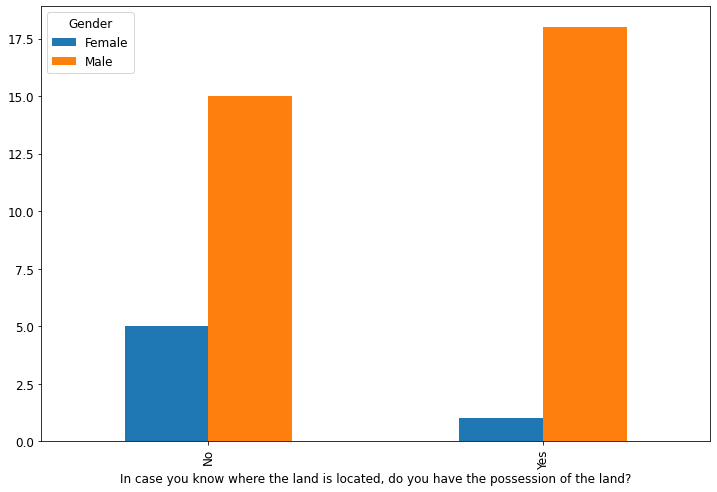

In [69]:
agr=df.loc[df['What is the nature of work being done by the family members?']=="Agriculture labourers"]
pd.crosstab(agr["In case you know where the land is located, do you have the possession of the land?"],agr["Gender"]).plot(kind="bar")
# Female land possession is abysmally low

<AxesSubplot:xlabel='In case you know where the land is located, do you have the possession of the land?'>

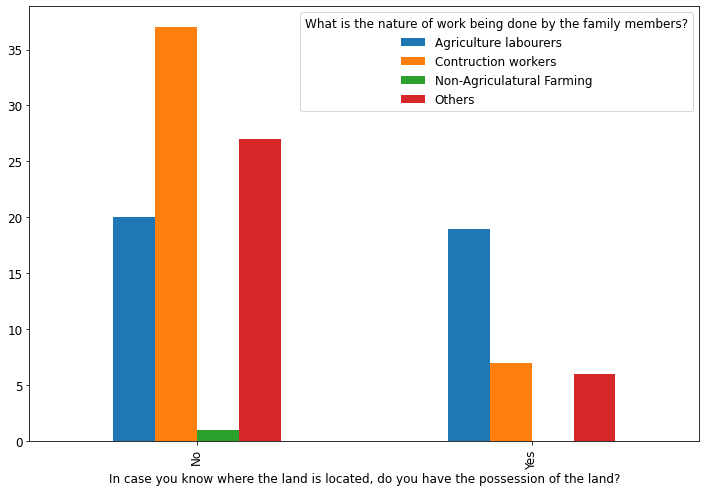

In [70]:
pd.crosstab(df["In case you know where the land is located, do you have the possession of the land?"],df["What is the nature of work being done by the family members?"]).plot(kind="bar")


<AxesSubplot:xlabel='How many members are there in your family? [Adult Female]', ylabel='Density'>

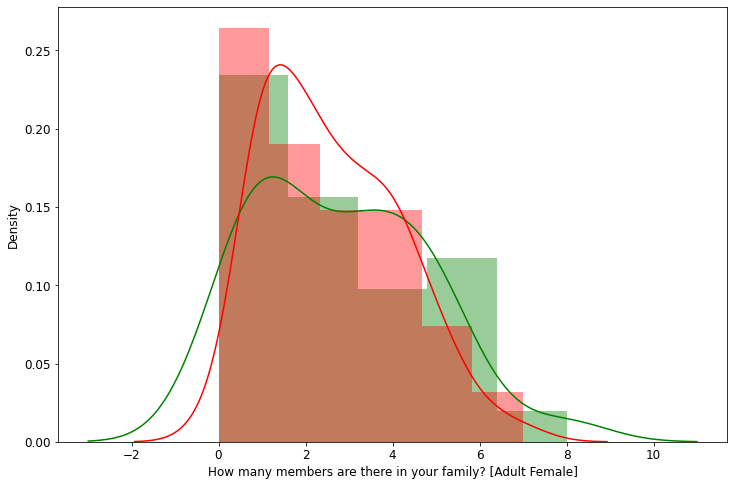

In [101]:
df.columns
#pd.crosstab(df['In case you know where the land is located, do you have the possession of the land?'],df["How many members are there in your family? [Adult Female]"]).plot(kind="bar")
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.distplot(df.loc[df['In case you know where the land is located, do you have the possession of the land?']=="Yes"]["How many members are there in your family? [Adult Female]"].replace("o",0).astype(float),color="green")
sns.distplot(df.loc[df['In case you know where the land is located, do you have the possession of the land?']=="No"]["How many members are there in your family? [Adult Female]"].replace("o",0).astype(float),color="red")

<AxesSubplot:xlabel='How many members are there in your family? [Children]', ylabel='Density'>

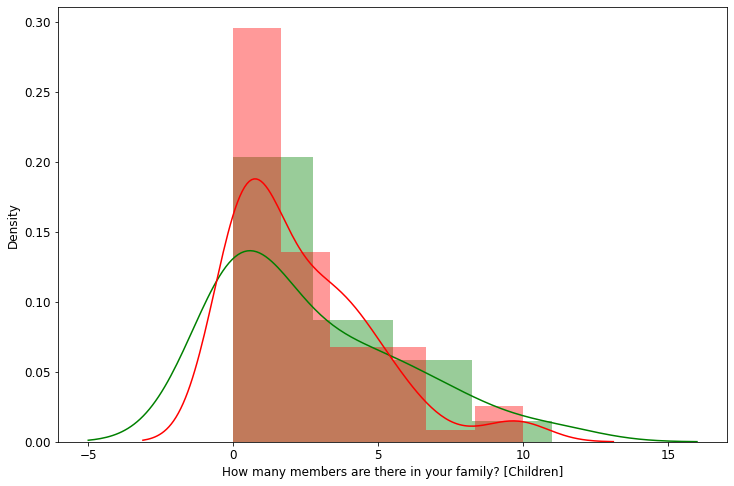

In [100]:
df.columns
#pd.crosstab(df["In case you know where the land is located, do you have the possession of the land?"],df["How many members are there in your family? [Children]"]).plot(kind="bar")
sns.distplot(df.loc[df['In case you know where the land is located, do you have the possession of the land?']=="Yes"]["How many members are there in your family? [Children]"],color="green")
sns.distplot(df.loc[df['In case you know where the land is located, do you have the possession of the land?']=="No"]["How many members are there in your family? [Children]"],color="red")

In [113]:
df["Village"].value_counts()
def vil(i):
    if i in ["Dholagarh","Dholagarh ",'Dhaulagarh  ']:
        return "Dholagarh"
    elif i=="Mudkheda":
        return "Mudkheda"
    
df["Village"]=df["Village"].apply(vil)

<AxesSubplot:xlabel='In case you know where the land is located, do you have the possession of the land?'>

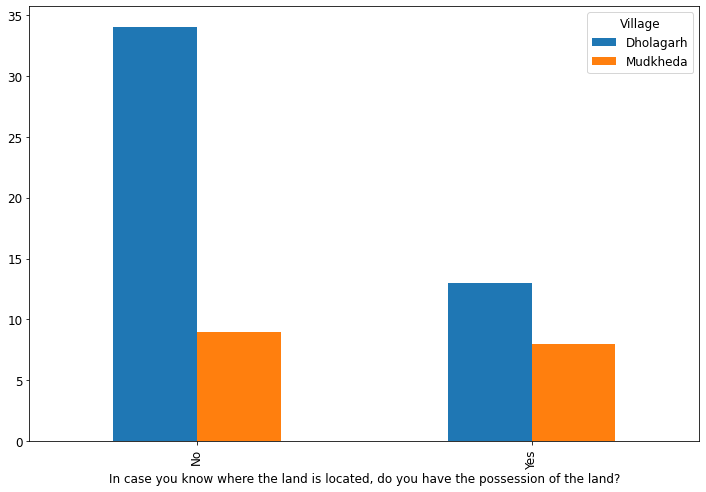

In [116]:
df.columns
pd.crosstab(df["In case you know where the land is located, do you have the possession of the land?"],df["Village"]).plot(kind="bar")#df["What is the nature of work being done by the family members?"]).plot(kind="bar")

In [37]:
df.columns
df.loc[(df['If you do not have possession, then why ?'].isnull())&(df['In case you know where the land is located, do you have the possession of the land?']=="No")][["Titleholder's Name","Serial no.","Gaurdian"]]
# Reasons for non posession not recorded for these people


,Titleholder's Name,Serial no.,Gaurdian
1,Laxmi,1954,Nattu
2,Chiddu Jatav,NaN,Bhagri Jatav
9,Jagdish,1951,Chote
11,Feran,1810,Baarelaal
12,Surash jatav,NaN,Brajlal jatav
13,Vijay,1863,Rajaram
15,Balkishan Jatav,1879,Tulsi Jatav
17,Gulab Jatav,1837,Naktu
18,Ramesh Jatav,1775,Cheuram
23,Hari jatav,1842,Bharosa jatav


In [32]:
df.loc[(df['In case you know where the land is located, do you have the possession of the land?']=="Yes")]['How many members are there in your family? [Children]'].replace("o",0).astype(float).median()
df['How many members are there in your family? [Children]']=df['How many members are there in your family? [Children]'].replace("o",0).astype(float)
# Families with land possession seen to have median of 1 children compared to 2 for families without land possesion

In [35]:
# Visualizing the same

<AxesSubplot:xlabel='In case you know where the land is located, do you have the possession of the land?'>

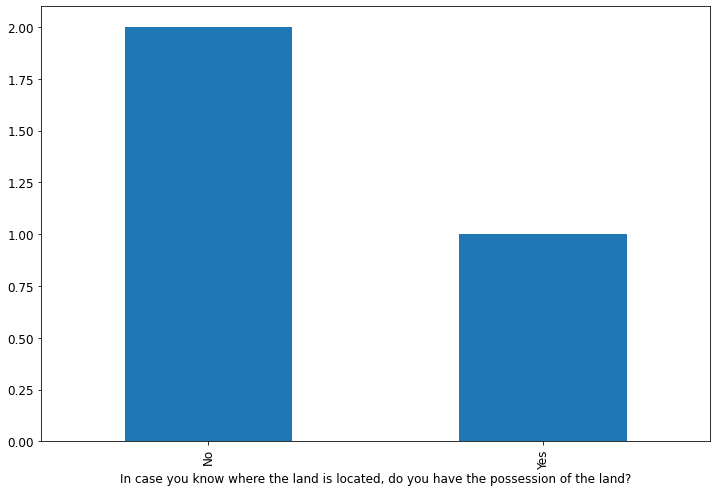

In [34]:
df.groupby("In case you know where the land is located, do you have the possession of the land?")['How many members are there in your family? [Children]'].median().plot(kind="bar")

In [21]:
df.loc[(df['In case you know where the land is located, do you have the possession of the land?']=="No")&(df['Do you know where is your land located?']=="Yes")][["Titleholder's Name","Serial no.","Gaurdian"]]
#These people dont have land possession but know where there land is located

,Titleholder's Name,Serial no.,Gaurdian
1,Laxmi,1954,Nattu
2,Chiddu Jatav,NaN,Bhagri Jatav
11,Feran,1810,Baarelaal
16,Narayan Jatav,1871,Pyaare
17,Gulab Jatav,1837,Naktu
19,Ramesh Jatav,1949,Kashi Ram Jatav
20,Janved Jatav,1950,Dharma Jatav
23,Hari jatav,1842,Bharosa jatav
26,Gomti / Hariram,1812,Hariram
30,Jiyaji Jatav,1860,Teja


In [19]:
#df.loc[(df['In case you know where the land is located, do you have the possession of the land?']=="No")]